In [243]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

BEER = 0
ADULT = 1
SCHOOL = 2
SEGMENTS = [BEER, ADULT, SCHOOL]
BOAT_SIZE = 20

## Population

(array([ 3.,  7., 21., 48., 44., 59., 36., 22., 11.,  5.]),
 array([ 63.043039  ,  68.35653216,  73.67002532,  78.98351848,
         84.29701164,  89.6105048 ,  94.92399796, 100.23749112,
        105.55098428, 110.86447744, 116.17797059]),
 <BarContainer object of 10 artists>)

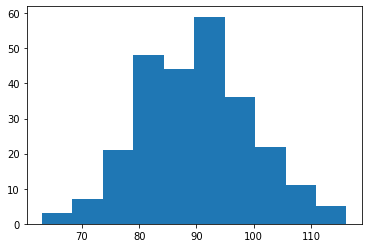

In [244]:
beer_lovers = np.random.normal(90, 10, 256)
plt.hist(beer_lovers)

(array([  8.,  52., 199., 355., 552., 488., 244.,  87.,  10.,   5.]),
 array([ 41.81092676,  48.84443802,  55.87794929,  62.91146056,
         69.94497183,  76.9784831 ,  84.01199436,  91.04550563,
         98.0790169 , 105.11252817, 112.14603943]),
 <BarContainer object of 10 artists>)

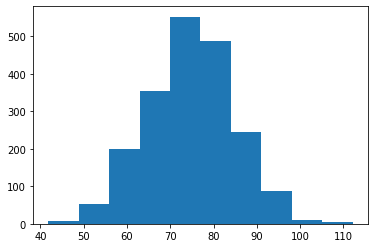

In [245]:
adults = np.random.normal(75, 10, 2000)
plt.hist(adults)

(array([  1.,   4.,  26.,  78., 160., 134.,  78.,  22.,   8.,   9.]),
 array([ 4.40456974, 12.59926033, 20.79395093, 28.98864152, 37.18333212,
        45.37802271, 53.57271331, 61.7674039 , 69.9620945 , 78.15678509,
        86.35147569]),
 <BarContainer object of 10 artists>)

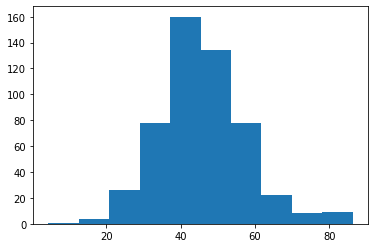

In [246]:
teachers = np.random.normal(75, 10, 20)
kids = np.random.normal(45, 10, 500)
schools = np.concatenate([teachers, kids])
plt.hist(schools)

In [247]:
anons = np.empty(365)
anons[:] = np.nan
body_weights = np.concatenate([beer_lovers, adults, schools, anons])
body_weights[np.random.choice(len(body_weights), replace=False, size=127)] = np.nan
segments = np.concatenate([
    np.full(len(beer_lovers), BEER),
    np.full(len(adults), ADULT),
    np.full(len(schools), SCHOOL),
    anons
])
df_pop = pd.DataFrame({'body_weight': body_weights, 'segment': segments})

df_pop

,body_weight,segment
0,84.025881,0.0
1,86.257675,0.0
2,75.811148,0.0
3,96.968516,0.0
4,89.654485,0.0
...,...,...
3136,NaN,NaN
3137,NaN,NaN
3138,NaN,NaN
3139,NaN,NaN


In [248]:
df_pop.groupby('segment').mean()

,body_weight
segment,
0.0,89.653317
1.0,74.752900
2.0,45.736906


(array([ 256.,    0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,
         520.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

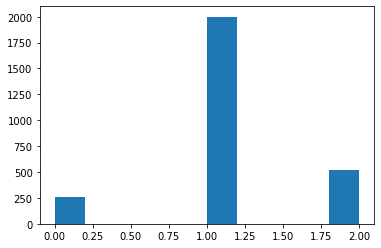

In [249]:
plt.hist(df_pop.segment)

## Trips

In [250]:
n_trips = 52*7
beer_prob = 0.25
rows = []
for trip_id in range(n_trips):
    weekday = np.random.randint(0,7)
    serves_beer = weekday >= 5 and np.random.random() < beer_prob
    # calculate sample props
    if weekday < 5:
        # oversample school
        weights = np.ones(len(df_pop))
        weights[df_pop.segment == SCHOOL] = 10
    elif serves_beer:
        # undersample school, oversample powerlifters
        weights = np.ones(len(df_pop))
        weights[df_pop.segment == POWER] = 30
        weights[df_pop.segment == ADULT] = 5
        weights[df_pop.segment == SCHOOL] = 1
    else:
        # random sample
        weights = np.ones(len(df_pop))
    gasts = df_pop.sample(BOAT_SIZE, weights = weights, replace=False).values
    for body_weight, segment in gasts:
        rows.append([trip_id, weekday, serves_beer, body_weight, segment])
df_trip = pd.DataFrame(rows, columns=['trip_id', 'weekday', 'serves_beer', 'body_weight', 'segment'])

(array([291.,   0.,   0.,   0.,   0., 340.,   0.,   0.,   0.,  17.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

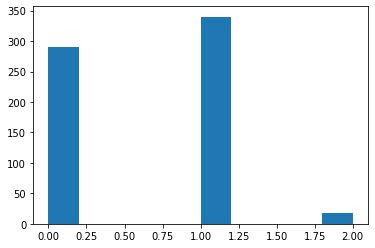

In [251]:
plt.hist(df_trip[df_trip.serves_beer].segment)

## Save data

In [252]:
df_pop.to_csv('population.csv', index=False)
df_trip.to_csv('trips.csv', index=False)